<html>
<body>
    <div class="image-container" style="display: flex;">
        <img src="https://ufal.br/ufal/resolveuid/5ba5577fc45f41f48a6e8e9311488b28" alt="Image 1" style="width: 15%; height: auto;">
        <img src="https://ic.ufal.br/site-logo" alt="Image 2" style="width: 15%; height: auto;">
    </div>
   <h1 align="center"> Redes Neurais e Aprendizado Profundo - 2023.1 </h1>
   <h2 align="center"> Professor: Tiago Figueiredo Vieira </h2>
</body>
</html>

---

# Estimativa da máxima verossimilhança

Implemente o algoritmo da estimativa da máxima verossimilhança para encontrar os parâmetros da distribuição que melhor descreve a função densidade de probabilidade que deu origem aos dados disponíveis na base de dados em anexo ```x_train.npy``` usando o Tensorflow.

Utilizar os nomes **mean** e **sigma** para as variáveis de **média** e **desvio padrão** respectivamente.

**Gere a resposta final como um array do numpy(np.array()) não como uma lista.**

Importando os dados

<Axes: >

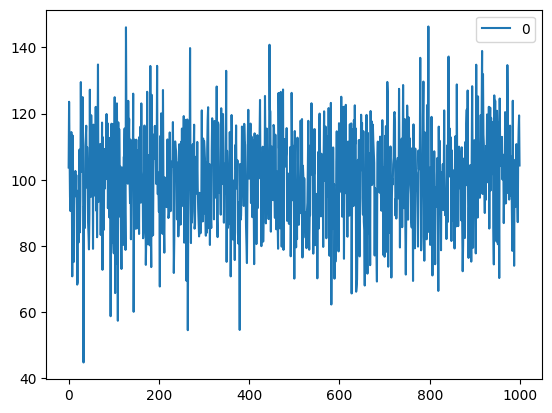

In [35]:
import requests
import tensorflow as tf
import seaborn as sns
import numpy as np

filename = 'x_train.npy'
url = f'https://github.com/matheuslevi11/Artificial-Intelligence/raw/main/Perceptron-Data/{filename}'

response = requests.get(url)

with open(filename, 'wb') as f:
    f.write(response.content)

data = np.load(filename)

sns.lineplot(data)

Ao observar os dados, eles se assemelham a uma distribuição uniforme, portanto, a estimativa de máxima verossimilhança será utilizada com relação a esta distribuição.

In [29]:
def uniform_pdf(x, a, b):
    return 1 / (b - a)

Para evitar os problemas com números muito pequenos, somamos o log da distribuição ao invés de multiplicar os valores

In [30]:
def log_likelihood(data, a, b):
    return tf.reduce_sum(tf.math.log(uniform_pdf(data, a, b)))

Definindo a função que utiliza o GradientTape do TensorFlow para calcular os gradientes

In [31]:
@tf.function
def gradient_log_likelihood(data, mean, std):
    with tf.GradientTape() as tape:
        tape.watch(mean)
        tape.watch(std)
        log_likelihood_value = log_likelihood(data, mean, std)
    grad_mean, grad_std = tape.gradient(log_likelihood_value, [mean, std])
    return grad_mean, grad_std

Definindo as variáveis para o treinamento

In [32]:
initial_mean = 0
initial_std = 1

learning_rate = 0.3

epochs = 10500

mean = tf.Variable(initial_mean, dtype=tf.float32)
sigma = tf.Variable(initial_std, dtype=tf.float32)

Realizando o treinamento, atualizando os parâmetros com o gradiente

In [33]:
for i in range(epochs):
    grad_mean, grad_std = gradient_log_likelihood(data, mean, sigma)
    mean.assign_sub(-learning_rate * grad_mean)
    sigma.assign_sub(-learning_rate * grad_std)

mean = mean.numpy()
sigma = sigma.numpy()

answer = np.array([mean, sigma])
print(answer)

[-145.01611  146.01613]


In [34]:
# Testes ocultos